# Subselecting concrete and abstract nouns

We now have a list of concrete-abstract word pairs generated using LexOPS (Taylor et al., 2020) and stored as `stim_long_brysbaert_all_possible_seed42.csv`. This notebook does the following:
- visualise the psycholinguistic properties
- subselect the word pairs
    - choose only nouns
    - word length < 8


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

dir = 'U:\ownCloud\projects\FakeDiamond\stimuli'

## Visualise psycholinguistic properties of concrete-abstract word pairs 

In [2]:
# tidy up our pre-selected concrete-abstract words 
# word_list = pd.read_csv(os.path.join(dir, 'stim_long_brysbaert_all_possible_seed42.csv')) 
word_list = pd.read_csv(os.path.join(dir, 'word_list_seed42_2023-04-14.csv')) 
word_list = word_list.applymap(lambda s: s.lower() if type(s) == str else s) # change all strings to lowercase
# word_list.rename(columns={'string':'word','item_nr':'set_nr','condition':'concreteness','CNC.Brysbaert':'CNC_M','Zipf.SUBTLEX_UK':'Zipf','PoS.SUBTLEX_UK':'PoS','AoA.Kuperman':'AoA'}, inplace=True)
word_list.rename(columns={'string':'word','item_nr':'set_nr','condition':'concreteness','CNC.Brysbaert':'CNC_M','Zipf.SUBTLEX_UK':'Zipf','AoA.BrysbaertBiemiller':'AoA','Syllables.CMU':'Syllables','Phonemes.CMU':'Phonemes','VAL.Glasgow_Norms':'Valence','RT.BLP':'RT'}, inplace=True)
word_list.drop(labels=['match_null'], axis=1, inplace=True) # drop irrelevant column
# word_list = word_list[word_list.PoS == 'noun'] # keep only nouns

# extract concreteness rating standard deviation from Brysbaert et al. (2014)
brysbaert_ratings = pd.read_csv(os.path.join(dir, 'resources', 'brysbaert_etal_2014.csv'))
brysbaert_ratings.rename(columns={'Word': 'word'}, inplace=True)
brysbaert_ratings.set_index('word', inplace=True)
word_list['CNC_SD'] = ''
word_list.set_index('word', inplace=True)
word_list['CNC_SD'] = word_list.index.map(brysbaert_ratings['Conc_SD'])
word_list.reset_index(inplace=True)
# word_list.rename(columns={'word': 'noun'}, inplace=True)
# word_list

# add imageability ratings from Scott et al. (2019)
scott_ratings = pd.read_csv(os.path.join(dir, 'resources', 'scott_etal_2019.csv'))
scott_ratings.rename(columns={'Words': 'word'}, inplace=True)
scott_ratings.set_index('word', inplace=True)
word_list['IMAG'] = ''
word_list.set_index('word', inplace=True)
word_list['IMAG'] = word_list.index.map(scott_ratings['IMAG'])
word_list.reset_index(inplace=True)
word_list.rename(columns={'word': 'noun'}, inplace=True)
word_list['IMAG'] = pd.to_numeric(word_list['IMAG'])
word_list

,noun,set_nr,concreteness,Zipf,Length,Syllables,Phonemes,AoA,CNC_M,Valence,RT,CNC_SD,IMAG
0,longing,1,abstract,3.408385,7,2,5,8,2.14,4.3030,679.666667,1.13,3.235
1,sulphur,1,concrete,3.351834,7,2,5,6,4.23,4.7647,668.250000,1.25,4.727
2,terror,2,abstract,4.061785,6,2,4,4,2.43,1.6765,531.722222,1.48,4.353
3,poison,2,concrete,3.916628,6,2,5,4,4.27,1.9706,520.650000,1.01,5.324
4,duty,3,abstract,4.614918,4,2,4,4,2.19,5.0313,574.027778,1.36,3.061
...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,slum,167,concrete,3.320018,4,1,4,6,4.03,2.2500,634.108108,0.98,5.387
334,failure,168,abstract,4.432371,7,2,5,4,2.08,1.7222,520.000000,1.06,3.794
335,grave,168,concrete,4.198163,5,1,4,2,4.56,2.4242,524.750000,0.80,6.241
336,wrath,169,abstract,3.409226,5,1,3,12,2.42,2.6364,627.324324,1.33,2.875


## Subselecting nouns

First change the format of the dataframe such that abstract and concrete words go side by side to help subsetting whilst preserving the matching of psycholinguistic properties.

In [3]:
# select concrete and rename columns
nouns_c = word_list.query("(concreteness=='concrete')").reset_index(drop=True) # select concrete only
new_col_name = [c+'_concrete' for c in nouns_c.columns.tolist()]
old_col_name = nouns_c.columns.tolist()
nouns_c.rename(columns=dict(zip(old_col_name, new_col_name)), inplace=True)

# select abstract and rename columns
nouns_a = word_list.query("(concreteness=='abstract')").reset_index(drop=True) # select abstract only
new_col_name = [c+'_abstract' for c in nouns_a.columns.tolist()]
old_col_name = nouns_a.columns.tolist()
nouns_a.rename(columns=dict(zip(old_col_name, new_col_name)), inplace=True)

# put pairs of concrete and abstract side by side for further subselecting whilst preserving matching
nouns_wide = pd.concat([nouns_c,nouns_a], axis=1)
nouns_wide

,noun_concrete,set_nr_concrete,concreteness_concrete,Zipf_concrete,Length_concrete,Syllables_concrete,Phonemes_concrete,AoA_concrete,CNC_M_concrete,Valence_concrete,...,Zipf_abstract,Length_abstract,Syllables_abstract,Phonemes_abstract,AoA_abstract,CNC_M_abstract,Valence_abstract,RT_abstract,CNC_SD_abstract,IMAG_abstract
0,sulphur,1,concrete,3.351834,7,2,5,6,4.23,4.7647,...,3.408385,7,2,5,8,2.14,4.3030,679.666667,1.13,3.235
1,poison,2,concrete,3.916628,6,2,5,4,4.27,1.9706,...,4.061785,6,2,4,4,2.43,1.6765,531.722222,1.48,4.353
2,sauce,3,concrete,4.787860,5,1,3,2,4.75,5.7188,...,4.614918,4,2,4,4,2.19,5.0313,574.027778,1.36,3.061
3,band,4,concrete,4.935511,4,1,4,2,4.68,6.0313,...,4.658200,6,2,6,4,1.60,6.8750,537.641026,1.04,3.290
4,brush,5,concrete,4.286689,5,1,4,2,4.54,5.5000,...,4.479139,5,1,4,4,1.66,5.9429,542.972973,1.01,3.412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,missile,165,concrete,3.664219,7,2,5,4,4.83,2.3438,...,3.521811,8,2,7,4,1.79,2.0606,659.228571,0.90,3.849
165,portrait,166,concrete,4.183298,8,2,7,6,4.90,5.7576,...,4.006854,8,2,8,8,2.00,6.6970,627.916667,1.14,2.529
166,slum,167,concrete,3.320018,4,1,4,6,4.03,2.2500,...,3.174302,3,1,2,8,1.96,2.4194,612.944444,1.37,2.710
167,grave,168,concrete,4.198163,5,1,4,2,4.56,2.4242,...,4.432371,7,2,5,4,2.08,1.7222,520.000000,1.06,3.794


Select our target words, which are nouns and have length of 7 letters or fewer.

In [4]:
# nouns_wide = nouns_wide.query("(Length_concrete<=7) and (Length_abstract<=7) and (CNC_SD_concrete<=1.2) and (CNC_SD_abstract<=1.2)")
# nouns_wide = nouns_wide.query("(CNC_SD_concrete<=1.4) and (CNC_SD_abstract<=1.4)")
nouns_wide.reset_index(drop=True, inplace=True)
# nouns.to_csv(os.path.join(dir, 'nouns_{}.csv'.format(date.today())))
nouns_wide

,noun_concrete,set_nr_concrete,concreteness_concrete,Zipf_concrete,Length_concrete,Syllables_concrete,Phonemes_concrete,AoA_concrete,CNC_M_concrete,Valence_concrete,...,Zipf_abstract,Length_abstract,Syllables_abstract,Phonemes_abstract,AoA_abstract,CNC_M_abstract,Valence_abstract,RT_abstract,CNC_SD_abstract,IMAG_abstract
0,sulphur,1,concrete,3.351834,7,2,5,6,4.23,4.7647,...,3.408385,7,2,5,8,2.14,4.3030,679.666667,1.13,3.235
1,poison,2,concrete,3.916628,6,2,5,4,4.27,1.9706,...,4.061785,6,2,4,4,2.43,1.6765,531.722222,1.48,4.353
2,sauce,3,concrete,4.787860,5,1,3,2,4.75,5.7188,...,4.614918,4,2,4,4,2.19,5.0313,574.027778,1.36,3.061
3,band,4,concrete,4.935511,4,1,4,2,4.68,6.0313,...,4.658200,6,2,6,4,1.60,6.8750,537.641026,1.04,3.290
4,brush,5,concrete,4.286689,5,1,4,2,4.54,5.5000,...,4.479139,5,1,4,4,1.66,5.9429,542.972973,1.01,3.412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,missile,165,concrete,3.664219,7,2,5,4,4.83,2.3438,...,3.521811,8,2,7,4,1.79,2.0606,659.228571,0.90,3.849
165,portrait,166,concrete,4.183298,8,2,7,6,4.90,5.7576,...,4.006854,8,2,8,8,2.00,6.6970,627.916667,1.14,2.529
166,slum,167,concrete,3.320018,4,1,4,6,4.03,2.2500,...,3.174302,3,1,2,8,1.96,2.4194,612.944444,1.37,2.710
167,grave,168,concrete,4.198163,5,1,4,2,4.56,2.4242,...,4.432371,7,2,5,4,2.08,1.7222,520.000000,1.06,3.794


Some nouns are not the most appropriate for a cognitive neuroscience experiment (based on intuitive judgement). Some nouns are mostly used in North America and might not be the most familiar to native speakers from our participant pool, who are more likely to be native British English speakers. As a quick diagnostic, we also check whether the nouns go well with the adjective `fake` (e.g., `fake nay`). So, I subselected them, along with their pair (to keep the psycholinguistic property matching), out by hand using Excel and keep a record of them here. 

In [5]:
nouns_removed = pd.read_excel(os.path.join(dir, 'nouns_removal_2023-03-21.xlsx'), index_col=False)
nouns_removed[nouns_removed['exclude?'].notnull()][['word_concrete','word_abstract']].values.tolist()

[['redhead', 'bummer'],
 ['comma', 'recount'],
 ['comet', 'bonkers'],
 ['vulva', 'scruple'],
 ['drapery', 'doting'],
 ['cowhide', 'asinine'],
 ['mascara', 'softie'],
 ['notch', 'wits'],
 ['wiper', 'goner'],
 ['crop', 'behalf'],
 ['bedmate', 'peeve'],
 ['cunt', 'innate'],
 ['skewer', 'taker'],
 ['cursor', 'whimsy'],
 ['mite', 'whim'],
 ['soy', 'circa'],
 ['attire', 'gripe'],
 ['tartar', nan],
 ['yarn', 'poof'],
 ['carp', 'vulgar'],
 ['ember', 'screwy'],
 ['vagina', 'renewal'],
 ['hearse', 'lieu'],
 ['bum', 'fraud'],
 ['spore', 'mono'],
 ['denture', 'reissue'],
 ['sex', 'doubt'],
 ['labia', 'cahoots'],
 ['nomad', 'repute'],
 ['triceps', 'rebuff'],
 ['dingo', 'schmuck'],
 ['sunlamp', 'scathe'],
 ['fencer', 'rehash']]

In [6]:
# remove the unsuitable words
nouns_wide = nouns_wide[nouns_removed['exclude?'].isnull()]
nouns_wide

C:\Users\rl05\AppData\Local\Temp\ipykernel_10648\3819974583.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nouns_wide = nouns_wide[nouns_removed['exclude?'].isnull()]


,noun_concrete,set_nr_concrete,concreteness_concrete,Zipf_concrete,Length_concrete,Syllables_concrete,Phonemes_concrete,AoA_concrete,CNC_M_concrete,Valence_concrete,...,Zipf_abstract,Length_abstract,Syllables_abstract,Phonemes_abstract,AoA_abstract,CNC_M_abstract,Valence_abstract,RT_abstract,CNC_SD_abstract,IMAG_abstract
0,sulphur,1,concrete,3.351834,7,2,5,6,4.23,4.7647,...,3.408385,7,2,5,8,2.14,4.3030,679.666667,1.13,3.235
1,poison,2,concrete,3.916628,6,2,5,4,4.27,1.9706,...,4.061785,6,2,4,4,2.43,1.6765,531.722222,1.48,4.353
2,sauce,3,concrete,4.787860,5,1,3,2,4.75,5.7188,...,4.614918,4,2,4,4,2.19,5.0313,574.027778,1.36,3.061
3,band,4,concrete,4.935511,4,1,4,2,4.68,6.0313,...,4.658200,6,2,6,4,1.60,6.8750,537.641026,1.04,3.290
4,brush,5,concrete,4.286689,5,1,4,2,4.54,5.5000,...,4.479139,5,1,4,4,1.66,5.9429,542.972973,1.01,3.412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,dungeon,164,concrete,3.136645,7,2,6,4,4.32,2.3636,...,3.304262,7,2,6,6,2.03,1.8182,615.578947,1.12,2.969
164,missile,165,concrete,3.664219,7,2,5,4,4.83,2.3438,...,3.521811,8,2,7,4,1.79,2.0606,659.228571,0.90,3.849
165,portrait,166,concrete,4.183298,8,2,7,6,4.90,5.7576,...,4.006854,8,2,8,8,2.00,6.6970,627.916667,1.14,2.529
166,slum,167,concrete,3.320018,4,1,4,6,4.03,2.2500,...,3.174302,3,1,2,8,1.96,2.4194,612.944444,1.37,2.710


In [7]:
# now turn df back into long form
nouns_concrete = nouns_wide[nouns_c.columns].reset_index(drop=True) # rename columns
nouns_abstract = nouns_wide[nouns_a.columns].reset_index(drop=True) # rename columns
nouns_concrete.rename(columns=dict(zip(nouns_concrete.columns.tolist(), word_list.columns)), inplace=True) # change to common column names
nouns_abstract.rename(columns=dict(zip(nouns_abstract.columns.tolist(), word_list.columns)), inplace=True) # change to common column names
nouns_long = pd.concat([nouns_concrete,nouns_abstract], axis=0).reset_index(drop=True)
nouns_long.sort_values(by=['set_nr','concreteness'], inplace=True, ascending=[True,False])
nouns_long.set_nr = np.repeat(range(1, int(len(nouns_long)/2)+1), 2)
nouns_long.reset_index(inplace=True, drop=True)
nouns_long

,noun,set_nr,concreteness,Zipf,Length,Syllables,Phonemes,AoA,CNC_M,Valence,RT,CNC_SD,IMAG
0,sulphur,1,concrete,3.351834,7,2,5,6,4.23,4.7647,668.250000,1.25,4.727
1,longing,1,abstract,3.408385,7,2,5,8,2.14,4.3030,679.666667,1.13,3.235
2,poison,2,concrete,3.916628,6,2,5,4,4.27,1.9706,520.650000,1.01,5.324
3,terror,2,abstract,4.061785,6,2,4,4,2.43,1.6765,531.722222,1.48,4.353
4,sauce,3,concrete,4.787860,5,1,3,2,4.75,5.7188,541.384615,0.59,6.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,instinct,138,abstract,4.006854,8,2,8,8,2.00,6.6970,627.916667,1.14,2.529
276,slum,139,concrete,3.320018,4,1,4,6,4.03,2.2500,634.108108,0.98,5.387
277,woe,139,abstract,3.174302,3,1,2,8,1.96,2.4194,612.944444,1.37,2.710
278,syringe,140,concrete,3.122247,7,2,5,10,4.81,3.4375,675.194444,0.57,6.400


In [8]:
nouns_long.IMAG.mean()

4.533842857142858

In [9]:
nouns_long.to_csv(os.path.join(dir, 'nouns_cleaned_{}.csv'.format(date.today())), index=False) # save to disk

## Visualise subselected nouns

In [10]:
# f, ax = plt.subplots(3, 2, figsize=(15,15))
# sns.set_context(font_scale=2)
# sns.histplot(x='CNC_M', hue='concreteness', data=nouns_long, ax=ax[0,0], element='step').set(title='Concreteness mean')
# sns.scatterplot(x='Conc_M', y='Conc_SD', data=brysbaert_ratings, s=2, alpha=0.5, ax=ax[0,1], color='black').set(title='Concreteness mean-SD distribution')
# sns.scatterplot(x='CNC_M', y='CNC_SD', data=nouns_long.query('concreteness == "abstract"'), s=5, alpha=0.7, ax=ax[0,1], color=(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
# )
# sns.scatterplot(x='CNC_M', y='CNC_SD', data=nouns_long.query('concreteness == "concrete"'), s=5, alpha=1, ax=ax[0,1], color=(1.0, 0.4980392156862745, 0.054901960784313725)
# )
# sns.histplot(x='AoA', hue='concreteness', data=nouns_long, ax=ax[1,0], element='step').set(title='Age of acquisition')
# sns.histplot(x='Zipf', hue='concreteness', data=nouns_long, ax=ax[1,1], element='step').set(title='Zipf frequency')
# sns.histplot(x='Length', hue='concreteness', data=nouns_long, ax=ax[2,0], element='step').set(title='Word length')
# sns.histplot(x='PoS', hue='concreteness', data=nouns_long, ax=ax[2,1]).set(title='Part of speech')
# f.suptitle('Psycholinguistic properties of {} concrete-abstract word pairs'.format(int(len(nouns_long)/2)), fontsize=16)

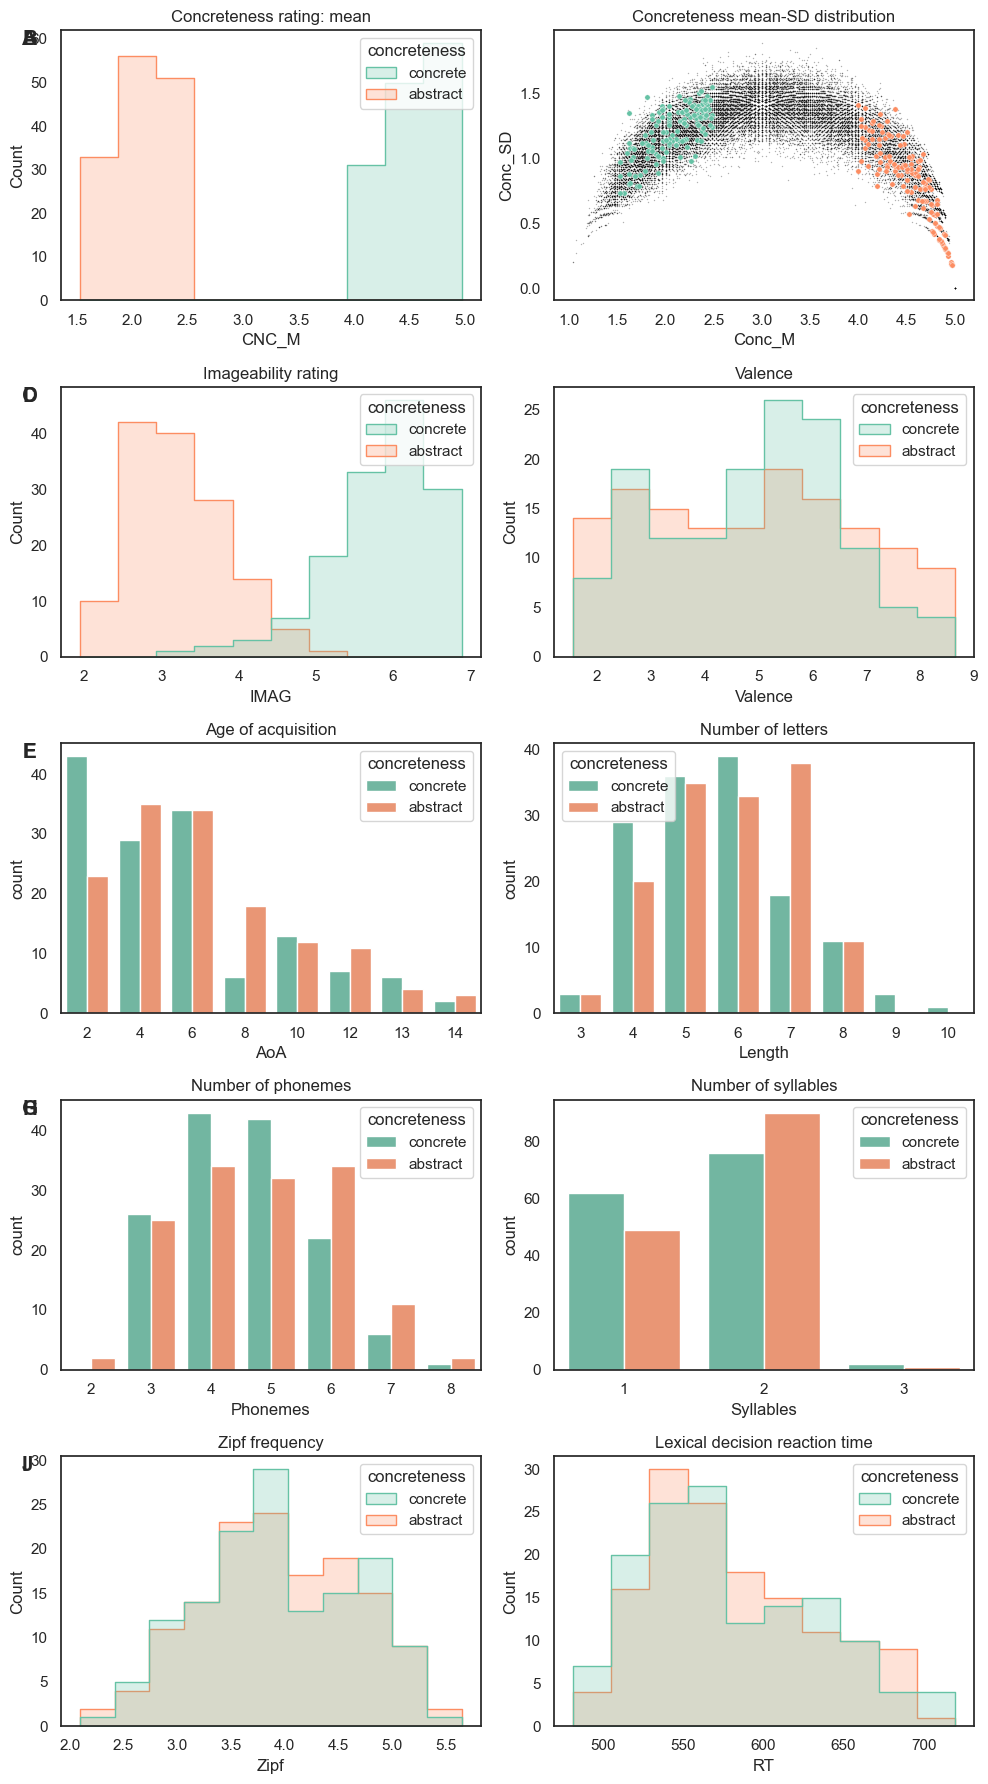

In [38]:
fig, axes = plt.subplots(5, 2, figsize=(10,18))
sns.set_context(font_scale=2)
sns.set_theme(style='white', palette='Set2')
sns.histplot(x='CNC_M', hue='concreteness', data=nouns_long, ax=axes[0,0], element='step').set(title='Concreteness rating: mean')
sns.scatterplot(x='Conc_M', y='Conc_SD', data=brysbaert_ratings, s=1, alpha=0.3, ax=axes[0,1], color='black').set(title='Concreteness mean-SD distribution')
sns.scatterplot(x='CNC_M', y='CNC_SD', data=nouns_long.query('concreteness == "abstract"'), s=15, alpha=1, ax=axes[0,1])
sns.scatterplot(x='CNC_M', y='CNC_SD', data=nouns_long.query('concreteness == "concrete"'), s=15, alpha=1, ax=axes[0,1])
sns.histplot(x='IMAG', hue='concreteness', data=nouns_long, ax=axes[1,0], element='step').set(title='Imageability rating')
sns.histplot(x='Valence', hue='concreteness', data=nouns_long, ax=axes[1,1], element='step').set(title='Valence')

sns.countplot(x='AoA', hue='concreteness', data=nouns_long, ax=axes[2,0]).set(title='Age of acquisition')
sns.countplot(x='Length', hue='concreteness', data=nouns_long, ax=axes[2,1]).set(title='Number of letters')

sns.countplot(x='Phonemes', hue='concreteness', data=nouns_long, ax=axes[3,0]).set(title='Number of phonemes')
sns.countplot(x='Syllables', hue='concreteness', data=nouns_long, ax=axes[3,1]).set(title='Number of syllables')

sns.histplot(x='Zipf', hue='concreteness', data=nouns_long, ax=axes[4,0], element='step').set(title='Zipf frequency')
sns.histplot(x='RT', hue='concreteness', data=nouns_long, ax=axes[4,1], element='step').set(title='Lexical decision reaction time')
# f.suptitle('Psycholinguistic properties of {} concrete-abstract word pairs'.format(int(len(nouns_long)/2)), fontsize=16)
fig.tight_layout()

for ax, label in zip(axes.ravel(), 'ABCDEFGHIJ'):
    ax.text(0.03, ax.get_position().ymax, label, transform=fig.transFigure,
            fontsize=15, fontweight='bold', va='top', ha='left')